# Setup

In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


# Get the Data

#### Download the Data

In [2]:
#importing data
df=pd.read_excel('data/FlightData.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Quick look at the data 

In [3]:
# information about the data
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
# describe about the data
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df.shape

(10683, 11)

In [6]:
# find the null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

## Handling Missing Values

<function matplotlib.pyplot.show(close=None, block=None)>

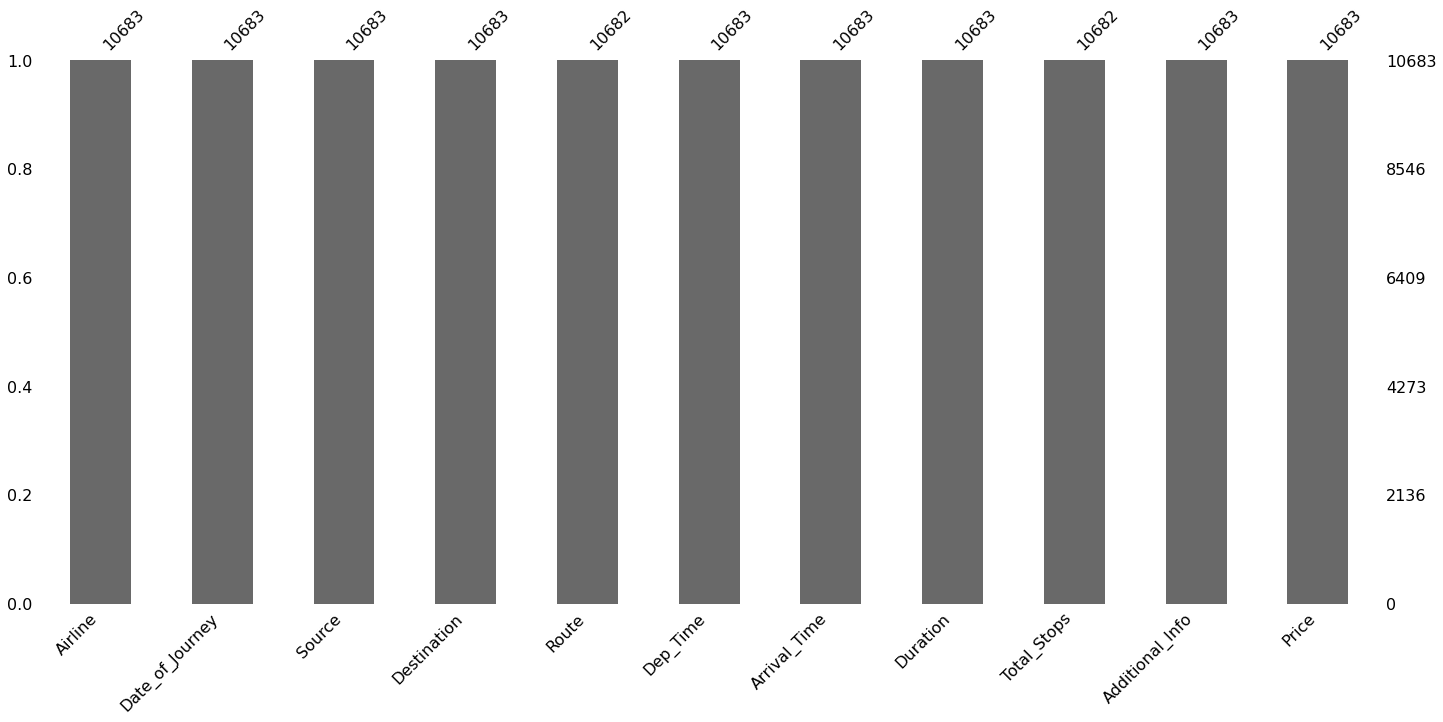

In [7]:
import missingno as msno
msno.bar(df)
plt.show

There are two missing values (Route & Total_Stops) which can be dropped directly as it's very less.

In [8]:
# drop the null values
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [11]:
df = df.replace("New Delhi", "Delhi")

# Visualize the Data 

#### Number of flights from each source

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


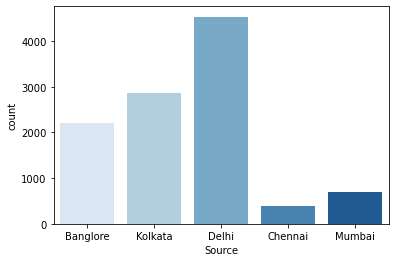

In [112]:
a = sns.countplot(x='Source',data=df, palette="Blues")
print(df['Source'].value_counts())

#### Airline vs Price

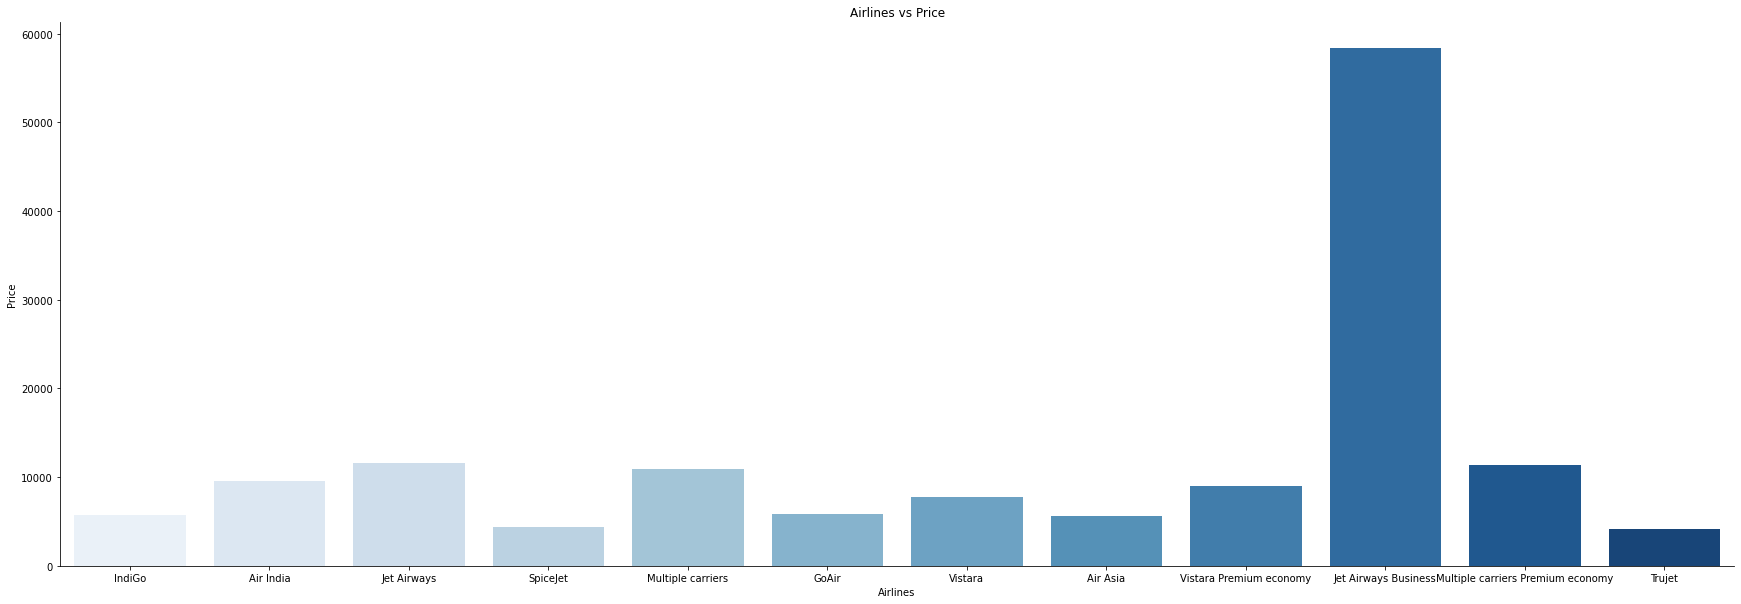

In [108]:
plt.figure(figsize=(30,10))

sns.barplot(data=df, x="Airline", y="Price", ci=None, palette="Blues")
plt.xlabel("Airlines")
plt.ylabel("Price")
plt.title("Airlines vs Price")

sns.despine()

plt.show()


From graph, we can see that Jet Airways Business have the highest price. Apart from the first airline rest have similar median.

#### Total_Stops vs Price 

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

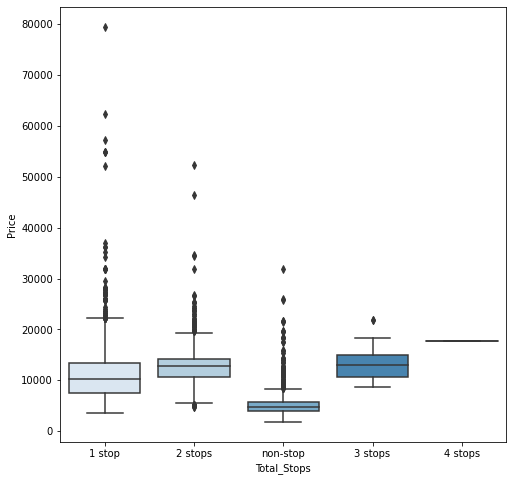

In [14]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False),palette="Blues")

#### Source vs Price

<AxesSubplot:xlabel='Source', ylabel='Price'>

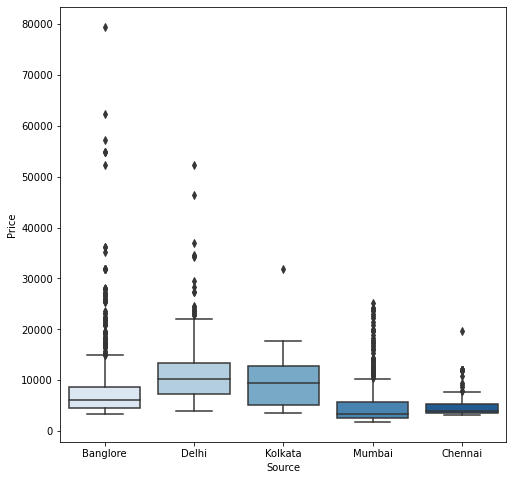

In [15]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),palette="Blues")

<AxesSubplot:xlabel='Destination', ylabel='Price'>

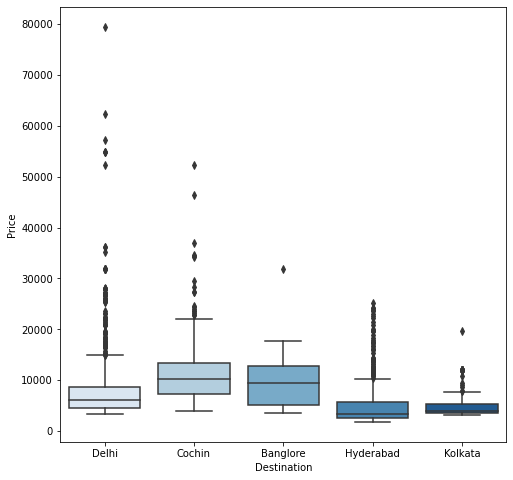

In [16]:
plt.figure(figsize=(8,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False), palette="Blues")

# Prepare the Data for Machine Learning Models

## Data Cleaning

In [17]:
# datatypes
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

The datatype of *Date_of_journey*, *Arrival_Time* and *Dep_Time* is object. So, it is converted into date and time for proper predicion.

In [18]:
# function for changing date and time format
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [19]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [20]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [21]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [22]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,2022-04-27 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-27 05:50:00,2022-04-27 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-27 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-04-27 18:05:00,2022-04-27 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,2022-04-27 16:50:00,2022-04-27 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2022-04-27 19:55:00,2022-04-27 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2022-04-27 20:45:00,2022-04-27 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2022-04-27 08:20:00,2022-04-27 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,Delhi,BLR → DEL,2022-04-27 11:30:00,2022-04-27 14:10:00,2h 40m,non-stop,No info,12648


In [23]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

The day and month are extracted from *Date_of_journey* and stored in two other columns and *Date_of_Journey* column is dropped.

In [24]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month


In [25]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,2022-04-27 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-04-27 05:50:00,2022-04-27 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-04-27 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-04-27 18:05:00,2022-04-27 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,2022-04-27 16:50:00,2022-04-27 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [26]:
df.drop('Date_of_Journey', axis=1, inplace=True)

From *Arrival_time* and *Dept_time*, hour and minutes are extracted and stored in new columns thereby dropping the previous columns

In [27]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    
def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [28]:
# Extract values from Dep_Time

# extracting hour
extract_hour(df,'Dep_Time')

# extracting minutes
extract_min(df,'Dep_Time')

# drop the column
drop_col(df,'Dep_Time')

In [29]:
# Extract values from Arrival_Time

# extracting hour
extract_hour(df,'Arrival_Time')

# extracting minutes
extract_min(df,'Arrival_Time')

# drop the column
drop_col(df,'Arrival_Time')

In [30]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Separating duration hours and minute from *Duration*

In [31]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [32]:
df['Duration']=duration

In [33]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [34]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]

In [35]:
df['dur_hour']=df['Duration'].apply(hour)

In [36]:
df['dur_min']=df['Duration'].apply(minutes)

In [37]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [38]:
drop_col(df,'Duration')

In [39]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

In [40]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [41]:
df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
dur_hour              int64
dur_min               int64
dtype: object

<AxesSubplot:xlabel='Arrival_Time_hour', ylabel='Price'>

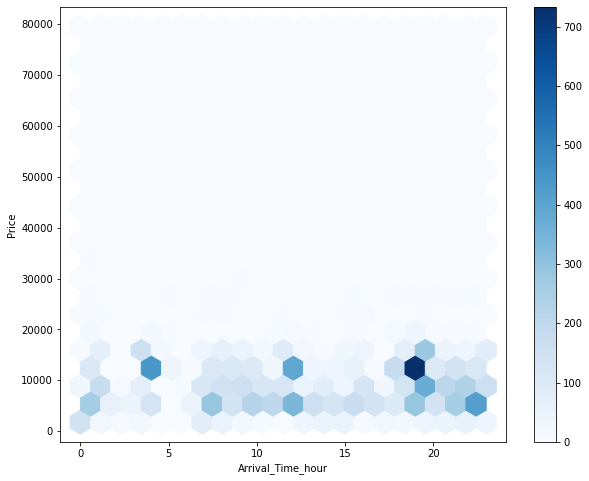

In [42]:
df.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=20,cmap=plt.cm.Blues,sharex=False,figsize=(10,8))

## Handling Categorical Attributes

In [43]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [44]:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_hour',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

In [45]:
categorical = df[column]

In [46]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info


In [47]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

As *Airline* is Nominal Categorical data, OneHotEncoding is performed.

In [48]:
# OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [49]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [50]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [51]:
# encoding of source column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [52]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [53]:
# encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [54]:
# encoding of route column
categorical['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [55]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [56]:
categorical.head(50)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,CCU,BLR,NaN,NaN,NaN
6,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,BLR,BOM,DEL,NaN,NaN
7,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1 stop,No info,BLR,BOM,DEL,NaN,NaN
8,Jet Airways,Banglore,Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,BLR,BOM,DEL,NaN,NaN
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,DEL,BOM,COK,NaN,NaN


In [57]:
drop_col(categorical,'Route')

In [58]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [59]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [60]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

In [61]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [62]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 5 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route1 has total 5 categories
Route2 has total 45 categories
Route3 has total 30 categories
Route4 has total 14 categories
Route5 has total 6 categories


In [63]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [64]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [65]:
categorical.head(50)

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,Delhi,1 stop,No info,0,34,8,13,5
5,SpiceJet,Kolkata,Banglore,non-stop,No info,2,5,29,13,5
6,Jet Airways,Banglore,Delhi,1 stop,In-flight meal not included,0,7,8,13,5
7,Jet Airways,Banglore,Delhi,1 stop,No info,0,7,8,13,5
8,Jet Airways,Banglore,Delhi,1 stop,In-flight meal not included,0,7,8,13,5
9,Multiple carriers,Delhi,Cochin,1 stop,No info,3,7,6,13,5


In [66]:
drop_col(categorical,'Additional_Info')

In [67]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [68]:
# encoding Total_Stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [69]:
categorical['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [70]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

After all preprocessing, the data is ready for the modeling

In [71]:
final_df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)

In [72]:
pd.set_option('display.max_columns',40)
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,13302,3,1,16,50,21,35,4,45


## Check For Outliers 

In [73]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

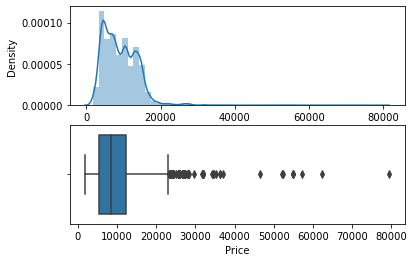

In [74]:
plot(final_df,'Price')

##  Handling Outliers

As there is some outliers in price feature,so we replace it  with median.

In [75]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])

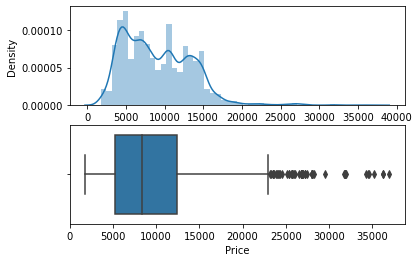

In [76]:
plot(final_df,'Price')

#### Separate the dataset in X and Y columns

In [77]:
X=final_df.drop('Price',axis=1)
y=df['Price']

# Looking for Correlations

In [78]:
corr_matrix = df.corr()

In [79]:
corr_matrix["Price"].sort_values(ascending=False)

Price                1.000000
dur_hour             0.508778
Arrival_Time_hour    0.024244
journey_month        0.010705
Dep_Time_hour        0.006799
Dep_Time_min        -0.024458
Arrival_Time_min    -0.086155
dur_min             -0.124855
journey_day         -0.165448
Name: Price, dtype: float64

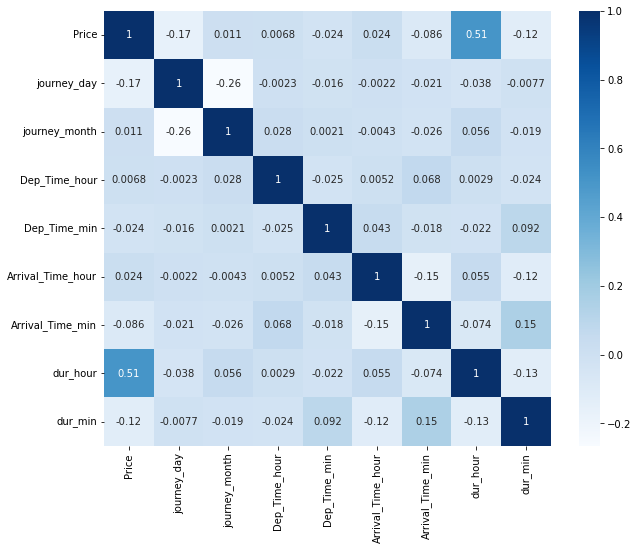

In [80]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True,cmap=plt.cm.Blues)
plt.show()

# Feature Selection 

In [81]:
from sklearn.feature_selection import mutual_info_classif

In [82]:
mutual_info_classif(X,y)

array([2.15961468, 2.05272581, 2.80319455, 2.28863731, 1.41456282,
       0.79051216, 0.76480173, 0.08765099, 0.66888125, 0.93979913,
       0.        , 0.56160359, 0.01408418, 0.32718856, 0.01482178,
       0.21949005, 0.        , 0.17295269, 1.52452957, 0.88867958,
       0.28501531, 1.54162825, 0.70564075, 0.28333258, 0.16553647,
       1.07940135, 0.87744962, 1.41609938, 1.19444538, 1.8729099 ,
       1.54615518, 1.77508201, 1.07144953])

In [83]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns, columns=['importance'])
imp.sort_values(by='importance',ascending=False)

,importance
Route2,2.794096
Route3,2.313811
Total_Stops,2.124499
Route1,2.034391
Arrival_Time_hour,1.848264
dur_hour,1.775337
Delhi,1.545172
Arrival_Time_min,1.524371
Cochin,1.511356
Route4,1.460288


# Create a Test Set

In [84]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [85]:
X_train.shape

(8545, 33)

In [86]:
X_test.shape

(2137, 33)

# Select and Train a Model

#### Training and Analyzing the models

In [87]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_scores = {}
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))

    r2_scores[f'{ml_model}'] = r2score
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)      
          

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR

Model is: RandomForestRegressor()
Training score: 0.9536988517969215
Predictions are: [ 5276.18       12038.32916667 13268.57633333 ... 13869.59633333
  7091.63        3819.85      ]


r2 score is: 0.8168107984389563
MAE:1163.855137474144
MSE:3757336.999522618
RMSE:1938.385152523259


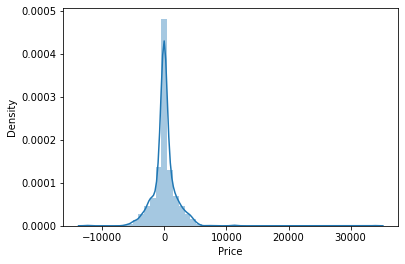

In [89]:
predict(RandomForestRegressor())

Model is: KNeighborsRegressor()
Training score: 0.7547734296765187
Predictions are: [ 5207.2 11498.6 12182.2 ...  9391.6 14108.   4263. ]


r2 score is: 0.6242123001895463
MAE:1787.884885353299
MSE:7707665.170388395
RMSE:2776.268209375383


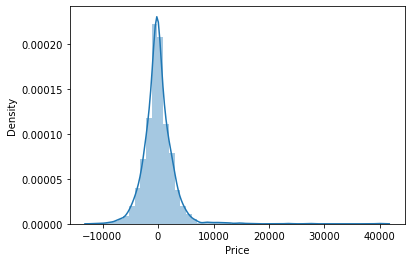

In [90]:
predict(KNeighborsRegressor())

Model is: LogisticRegression()
Training score: 0.3471035693387946
Predictions are: [5228 8610 8610 ... 7740 6795 3383]


r2 score is: 0.4526041892022997
MAE:2045.5956948993917
MSE:11227466.00655124
RMSE:3350.741113030256


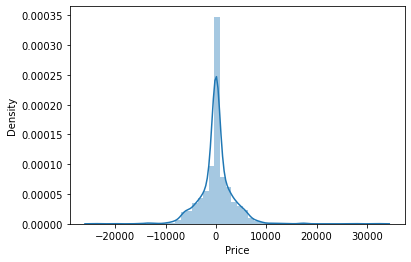

In [91]:
predict(LogisticRegression())

Model is: GradientBoostingRegressor()
Training score: 0.8115098419794184
Predictions are: [ 5263.47418488 11663.78351989 12038.16213412 ... 11888.10307991
  9869.52450629  4740.77367482]


r2 score is: 0.767535517658215
MAE:1487.6827579260494
MSE:4768007.028441598
RMSE:2183.5766596209983


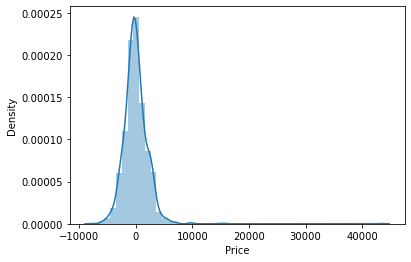

In [92]:
predict(GradientBoostingRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9714645354714544
Predictions are: [ 5911. 10844. 13469. ... 13067.  6795.  4282.]


r2 score is: 0.6978111433185821
MAE:1363.6287084698174
MSE:6198102.084495269
RMSE:2489.598779822819


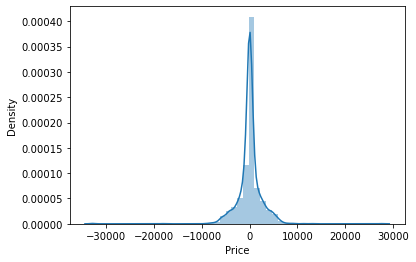

In [93]:
predict(DecisionTreeRegressor())

Model is: SVR()
Training score: 0.04060421702221295
Predictions are: [7838.59703934 8664.38860015 8374.24992665 ... 8470.32879296 8319.53892139
 7811.84634148]


r2 score is: 0.036065312385283876
MAE:3391.8389177780923
MSE:19770965.952330742
RMSE:4446.455436899232


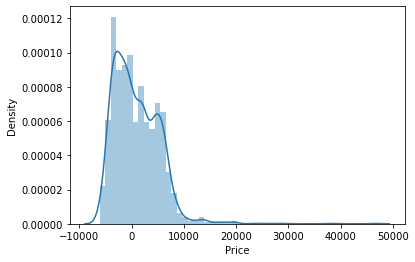

In [94]:
predict(SVR())

# Analyze the Models

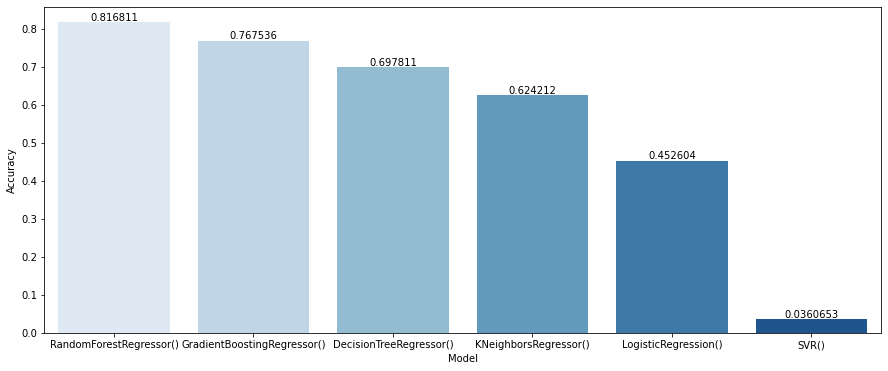

In [95]:
# Comparing Different R2 Scores
plt.figure(figsize=(15,6))
scores = pd.DataFrame(r2_scores.items(),columns=['Model', 'Accuracy'])
ax = sns.barplot(data=scores.sort_values("Accuracy", ascending = False),x='Model',y='Accuracy',palette='Blues')
ax.bar_label(ax.containers[0]);

# Fine-Tune The Model

## Randomized Search

In [96]:
from sklearn.model_selection import RandomizedSearchCV


In [97]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [98]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=120; total time=   0.6s[CV] END ...max_depth=5, max_features=sqrt, n_estimators=120; total time=   0.7s

[CV] END ..max_depth=10, max_features=sqrt, n_estimators=180; total time=   1.8s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=180; total time=   1.9s
[CV] END ..max_depth=10, max_features=sqrt, n_estimators=180; total time=   2.0s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=120; total time=   0.9s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=220; total time=   4.2s
[CV] END ..max_depth=20, max_features=sqrt, n_estimators=220; total time=   4.3s
[CV] END ..max_depth=10, max_features=auto, n_estimators=180; total time=   7.1s
[CV] END ..max_depth=10, max_features=auto, n_estimators=180; total time=   6.5s
[CV] END ..max_depth=10, max_features=auto, n_estimators=180; total time=   6.4s
[CV] END ..max_depth=20, max_features=sqrt, n_es

{'n_estimators': 180, 'max_features': 'auto', 'max_depth': 10}

In [99]:
# best parameter
rf_random.best_params_

{'n_estimators': 180, 'max_features': 'auto', 'max_depth': 10}

# Evaluate the System

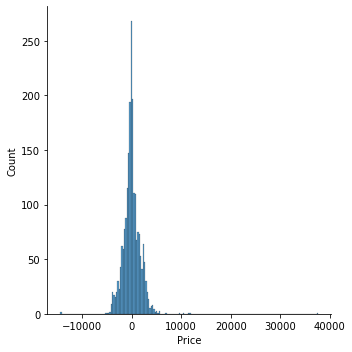

In [100]:
# predicting the values
prediction = rf_random.predict(X_test)

# distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [101]:
r2_score(y_test,prediction)

0.8260418390924128